# TENSORFLOW INTRO

This tutorial is based on the Youtube Video:

https://www.youtube.com/watch?v=PicxU81owCs

## KEY CONCEPTS

Tensorflow provides a development interface to implement your ML model as a graph, where each node is an __operation__ (with any number of inputs and outputs) and each edge (=line connecting the nodes) are the tensors.

<img src="tensorflow.jpg">

## TYPES OF NODES

**VARIABLES**: So, as can be seen in the chart above, __variables__ are _stateful_ nodes that output their current value (_stateful_ in this context means that their state -value- does not change accross multiple executions of a graph). Do  not miss that being nodes as they are, they are still __operations__ , although a type of operation that generates a fixed output.

**PLACEHOLDERS**: are nodes whose value is input at the execution time. In the diagram above "X" and "Y" are placeholders. They have a __datatype__ and a __shape__.

**OPERATIONS**: the last node type are __mathematical operations__. It is important not confusing these operations ("TensorFlow Mathematical Operations") with Numpy's.

## BUILDING THE MODEL

let's create a simple model:

In [3]:
import tensorflow as tf

In [4]:
import numpy as np

In [5]:
b = tf.Variable(tf.zeros((100,)))

In [6]:
W=tf.Variable(tf.random_uniform((784,100),-1,1))

In [7]:
x=tf.placeholder(tf.float32,(100,784))

In [8]:
h=tf.nn.relu(tf.matmul(x,W)+b)

with the instructions above what we have built is a graph. No data has been entered in the system and consequently things do not "do" anything yet. What we have so far is just a __graph__ that we can operate. We can also visualize it.

As we build the __graph__ TensorFlow adds a lot of stuff in the background. Lets take a look at it:

In [9]:
tf.get_default_graph().get_operations()

[<tf.Operation 'zeros/shape_as_tensor' type=Const>,
 <tf.Operation 'zeros/Const' type=Const>,
 <tf.Operation 'zeros' type=Fill>,
 <tf.Operation 'Variable' type=VariableV2>,
 <tf.Operation 'Variable/Assign' type=Assign>,
 <tf.Operation 'Variable/read' type=Identity>,
 <tf.Operation 'random_uniform/shape' type=Const>,
 <tf.Operation 'random_uniform/min' type=Const>,
 <tf.Operation 'random_uniform/max' type=Const>,
 <tf.Operation 'random_uniform/RandomUniform' type=RandomUniform>,
 <tf.Operation 'random_uniform/sub' type=Sub>,
 <tf.Operation 'random_uniform/mul' type=Mul>,
 <tf.Operation 'random_uniform' type=Add>,
 <tf.Operation 'Variable_1' type=VariableV2>,
 <tf.Operation 'Variable_1/Assign' type=Assign>,
 <tf.Operation 'Variable_1/read' type=Identity>,
 <tf.Operation 'Placeholder' type=Placeholder>,
 <tf.Operation 'MatMul' type=MatMul>,
 <tf.Operation 'add' type=Add>,
 <tf.Operation 'Relu' type=Relu>]

This is the level of __abstraction__ that TensorFlow brings above Python. When we __compute__ our graph, this is what will be computed behind the curtains.

We have different methods to explore our graph. For instance we can list all the "trainable" variables with this call:

In [10]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(100,) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(784, 100) dtype=float32_ref>]

In [11]:
tf.global_variables(scope=None)

[<tf.Variable 'Variable:0' shape=(100,) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(784, 100) dtype=float32_ref>]

For a full description of the TensorFlow object, check the official Google documentation at:

https://www.tensorflow.org/api_docs/python/tf/Variable

## SESSIONS

This graph can be deployed by initiating a __session__. This session will have a context (i.e. running on CPU, or in GPU, etc). At the time of writing these lines, Google is providing their own hardware units, called TPU's (Tensor Processing Units) that are orders of magnitude faster than __GPU's__. So, properly speaking a session is a __hardware environment__ where the graph is going to be run.

In order to work with sessions, we instantiate a __session object__ and then we __run__ it. The run method has two arguments:
+ __Fetches__: this is the __list of graph nodes__ that return the -output- values of the nodes
+ __Feeds__: this is a __dictionary__ that maps the graph nodes to specific values. Here is where we provide the inputs to the placeholders that we may have defined in our graph.

So, lets add some new lines to our graph to instantiate the graph and then run it:

In [12]:
sess=tf.Session()

In [13]:
sess.run(tf.global_variables_initializer())

In [14]:
sess.run(h,{x:np.random.random_sample((100,784))})

array([[0.48134327, 2.7830071 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 3.048261  , ..., 4.2065988 , 0.        ,
        3.5582352 ],
       [0.        , 2.5946696 , 0.        , ..., 0.        , 2.1184943 ,
        4.1256914 ],
       ...,
       [0.25269556, 8.298987  , 0.        , ..., 7.601764  , 0.        ,
        1.9672672 ],
       [0.        , 3.5237079 , 0.5716815 , ..., 2.3065104 , 0.        ,
        0.        ],
       [0.        , 5.649251  , 8.805585  , ..., 3.4046314 , 0.        ,
        3.1920242 ]], dtype=float32)

Once we have our graph deployed onto a session what we have is a __execution environment__

## TRAINING THE ML MODEL

In order to implement a Machine Learning model (in our case, a Neural Network) we need to define a __loss__ function. In Tensorflow we can use placeholders for labels and then specify a loss function using lables and predictions.

So, we will have a __prediction__ as the top (output) of our neural network. This will be the end of our feed-forward part. We will store this in a variable. 
Then we have to define the __cross entropy__. This cross_entropy will be defined something like this:

    cross_entropy=-tf.reduce_sum(label*tf.log(prediction),axis=1)

*Note: the axis=10 in the sentence above means it applies to columsn (axis=0 is applied to rows)*

Once we have the loss defined, we have to define the __gradient__. In order to do this in TensorFlow we first have to define an __optimizer__. Each particular learning algorithm has an optimizer. For example we can use the Gradient Descent algorithm. TensorFlow comes 8at the momento of writing this) with 11 pre-defined optimizers and there are even more that are provided by the community. For a full list of supported optimizers, please check:

https://www.tensorflow.org/api_guides/python/train

The command to create an optimizer object is something like this:

    train_step=tf.train.GradientDescentOptimizer(lr)

So, the optimizer is just the __object__. In order to use it we have to invoke a method called __minimize__, that takes as the argument the __node that we want to minimize__ its output. In order to do this, we can extend the previous command to mek it look like this:

    tf.train.GradientDescentOptimizer(lr).minimize(cross_entropy)

So, when we evaluate the node "train_step" it will actually apply the gradient into all the variables in our model. This is because the .minimize method does two things in TensorFlow:
1. It first computes the gradient of our model (in the example above that would be the cross_entropy gradient)
2. It will apply the gradient updates to all the variables (n our example that would be the "b" and the "W")

The next logical question is: how do we actually compute the gradient? In TensorFlow, every node has a gradient operation attached to it. The gradient is backpropagated __automatically__ by TensorFlow, behind the frontend of the developer. By default the gradient will be calculated in relation to what we defined as variables in our model ("b" and "W" in our graph)

Once we understand how the gradient can be calculated, we can simply iterate it using a loop, for example like this:

sess=tf.Session()

sess.run(tf.initialize_all_variables())

for i in range (1000):

    batch_X,batch_label=data.next_batch()
    
    sess.run(train_step,feed_dict={x: batch_x, label: batch_label})

So, when we run sess.run it applies to __all__ the variables in our graph, and as arguments we pass the __dictionary__ (feed_dict) composed of the graph nodes as the dictionary keys and numpy data as the dictionary values.

*Note: TensorFlow will automatically convert numpy arrays into tensors when we feed it into our model*

## VARIABLE SHARING

An important feature of TensorFlow is that you can run the code in multiple devices at the same time, which implies that you have to -somehow- be able to reference the same variables, with the same scope for all the instances. TensorFlow provides a simple way to deal with this. It is called __variable scoping__.

Variable scoping feature allows us to __document the names__ (and types and shapes too!) of our neurons. A variable scope provides a __name spacing__ scheme to avoid colissions (clashes).

*get_variable* will create a certain variable for you if that variable __does not__ exist in a given context or will access that variable for you if it __does__ exist.

*variable_scope* provides a simple "name-space-ing" to avoid clashes.

Let's see an example:

with tf.variable_scope("foo"):

    v=tf.get_variable("v",shape=[1])                 #v.name=="foo/v:0"

with tf.variable_scope("foo", reuse=True):

    v1=tf.get_variable("v")                          #shared variable found!!!!!
    
with tf.variable_scope("foo",reuse=False"):

    v1=tf.get_variable("v")                          #CRASHES as foo/v:0 already exists!!!!

## EXAMPLE

In [15]:
import numpy as np
def generate_dataset():
    x_batch=np.linspace(-1,1,101)
    y_batch=2*x_batch + np.random.randn(*x_batch.shape)*0.3
    return x_batch,y_batch

In [16]:
print (generate_dataset())

(array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
       -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
       -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
       -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
       -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
       -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,
        0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,
        0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,
        0.44,  0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,
        0.62,  0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,
        0.8 ,  0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,
        0.98,  1.  ]), array([-1.84977843, -2.22086641, -1.70728398, -1.40892649, -1.6259876 ,
       -1.77353969, -1.97495161, -1.76940529, -1.62816675, -1.71685034,
       -1.74159725, -1.52011563, -1.33685346, -1.16224615, -1.

In [17]:
def linear_refression():
    return NotImplementedError

In [18]:
import matplotlib
from matplotlib import pyplot as plt

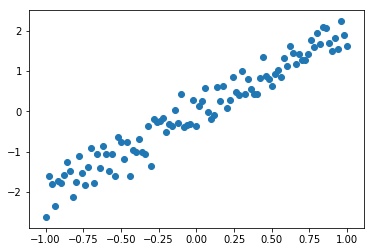

In [19]:
x_batch,y_batch=generate_dataset()
plt.figure(1)
plt.scatter(x_batch,y_batch)
plt.show()

So, lets implement the linear regression model and also see how we can use TensorFlow to implement it (that means implementing the function "run"). First, we implement the linear regression model. Its a very simple one:

In [31]:
def linear_regression():
    x=tf.placeholder(tf.float32,shape=(None,),name='x')
    y=tf.placeholder(tf.float32,shape=(None,),name='y')
    
    with tf.variable_scope('lreg') as scope:
        w=tf.Variable(np.random.normal(),name='W')
        y_pred=tf.multiply(w,x)
        
        loss = tf.reduce_mean(tf.square(y_pred-y))
    return x,y,y_pred,loss

Now we can define the "run" function:

In [34]:
def run():
    x_batch,y_batch=generate_dataset()
    x,y,y_pred,loss=linear_regression()
    optimizer=tf.train.GradientDescentOptimizer(0.1).minimize(loss)
    init = tf.global_variables_initializer()
    with tf.Session() as session:
        session.run(init)
        
        feed_dict={x:x_batch,y:y_batch}
        for _ in range(30):
            loss_val,_=session.run([loss,optimizer],feed_dict)
            print('loss:',loss_val.mean())
            
        y_pred_batch = session.run(y_pred,{x:x_batch})
        
        plt.figure(1)
plt.scatter(x_batch,y_batch)
plt.plot(x_batch,y_pred_batch)
plt.show()
        

In [35]:
run()

loss: 1.6526263
loss: 1.4465111
loss: 1.2674745
loss: 1.111959
loss: 0.9768745
loss: 0.8595368
loss: 0.7576145
loss: 0.66908234
loss: 0.5921812
loss: 0.525383
loss: 0.4673605
loss: 0.41696078
loss: 0.37318227
loss: 0.3351553
loss: 0.30212414
loss: 0.27343246
loss: 0.2485102
loss: 0.22686212
loss: 0.20805804
loss: 0.19172445
loss: 0.17753664
loss: 0.16521278
loss: 0.15450798
loss: 0.14520955
loss: 0.1371327
loss: 0.13011692
loss: 0.12402288
loss: 0.11872945
loss: 0.114131436
loss: 0.11013749


NameError: name 'y_pred_batch' is not defined

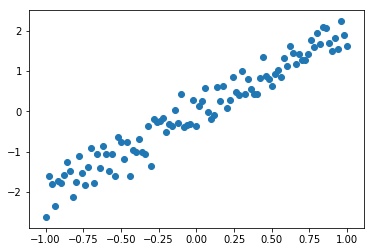

In [37]:
plt.figure(1)
plt.scatter(x_batch,y_batch)
plt.plot(x_batch,y_pred_batch)
plt.show()